# INCOME PREDICTION

In this analysis we will be trying to obtain the best possible model to classify based on the income whether greater than 50K or less than 50K.

## Importing the required libraries

In [1]:
import numpy as np 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

## Loading the Data

In [2]:
#Analyse the first few rows of the dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data preprocessing and cleaning

In [3]:
df.shape

(32561, 15)

In [4]:
#describe method provides the basic info about the dataset such as max, min value. Standard deviation,
#mean, median etc
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#info method can be used to check if any missing values are present
# in our feature columns. It also gives the data types of our feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Check the percentage and number of missing values in feature columns

for i in df.columns:
    non_value = df[i].isin(['?']).sum()
    if non_value > 0:
        print(i)
        print('{}'.format(float(non_value) / (df[i].shape[0]) * 100))
        print('\n')

workclass
5.638647461687294


occupation
5.660145572924664


native-country
1.7904855501980899




In [7]:
#selecting all the rows without the '?' sign.
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

In [8]:
df = df.drop('fnlwgt', axis=1)

## Useful graphs

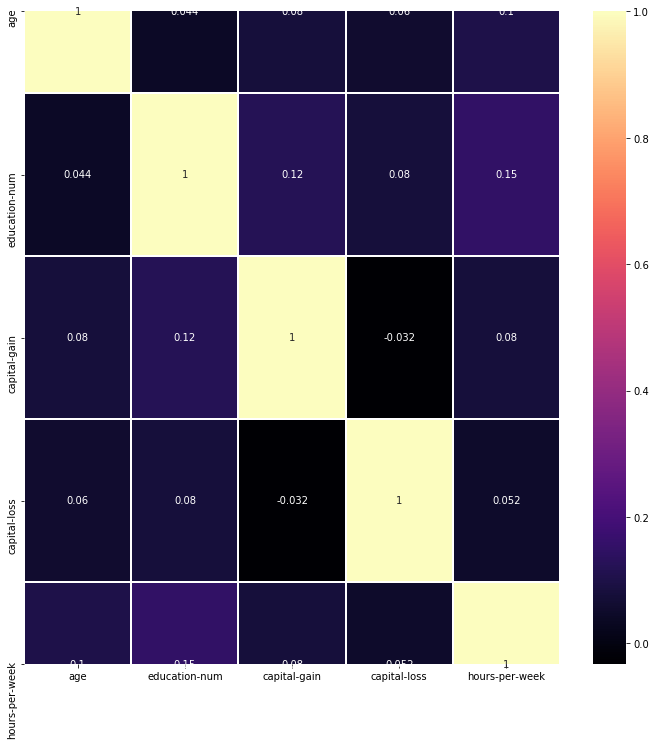

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='magma', linecolor='white', linewidths=1)
plt.show()

As can be observed from the above heatmap the correlation among the features does'nt seem to be strong. Hence we cannot reduce the number of features by droping few. We need to try other methods of feture selections

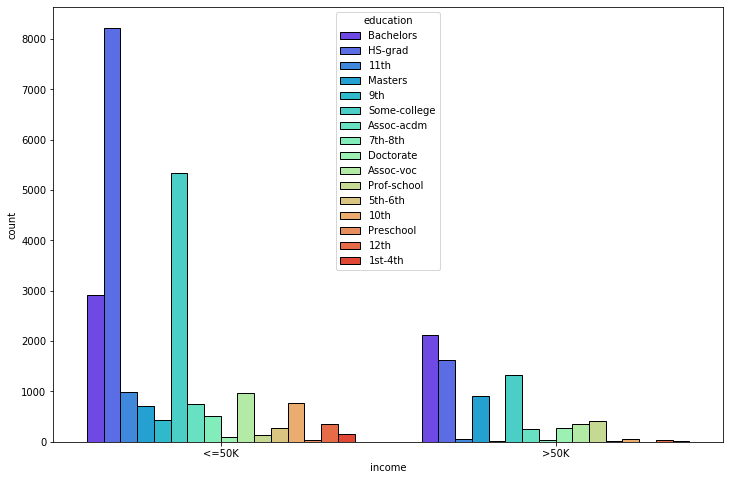

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df['income'], hue = df['education'], palette = 'rainbow', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

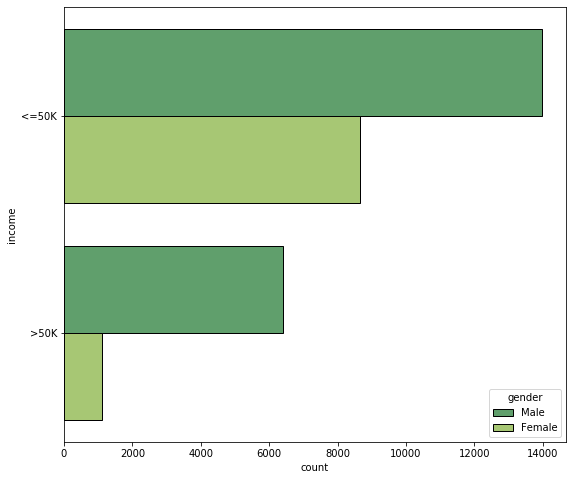

In [11]:
plt.figure(figsize=(9,8))
sns.countplot(y = df['income'], hue = df['gender'], palette = 'summer', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

The number of men with each qualification
HS-grad         6734
Some-college    4171
Bachelors       3522
Masters         1118
Assoc-voc        852
11th             677
Assoc-acdm       613
10th             570
Prof-school      455
7th-8th          425
9th              336
Doctorate        294
12th             255
5th-6th          219
1st-4th          108
Preschool         31
Name: education, dtype: int64


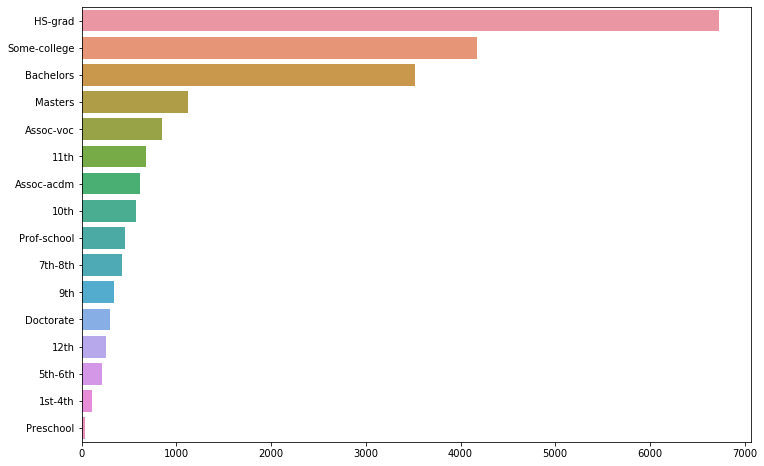

In [12]:
print("The number of men with each qualification")
print(df[df['gender'] == 'Male']['education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['gender'] == 'Male']['education'].value_counts().values, y = df[df['gender'] == 'Male']['education'].value_counts().index, data = df)
plt.show()

HS-grad         3106
Some-college    2507
Bachelors       1522
Masters          509
Assoc-voc        455
Assoc-acdm       395
11th             371
10th             250
7th-8th          132
12th             122
9th              119
Prof-school       87
Doctorate         81
5th-6th           69
1st-4th           43
Preschool         14
Name: education, dtype: int64


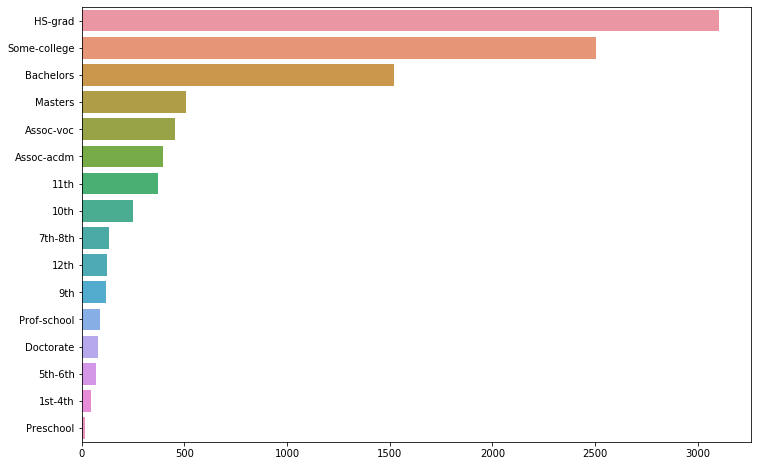

In [13]:
("The number of women with each qualification")
print(df[df['gender'] == 'Female']['education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['gender'] == 'Female']['education'].value_counts().values, y = df[df['gender'] == 'Female']['education'].value_counts().index, data = df)
plt.show()

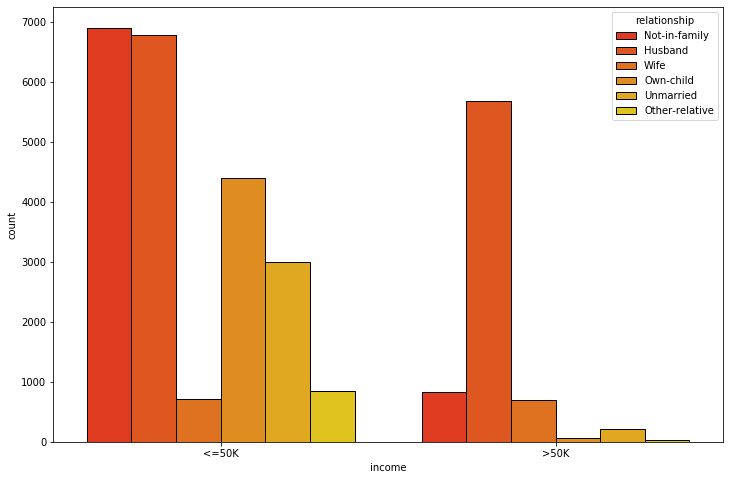

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df['income'], hue = df['relationship'], palette = 'autumn', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

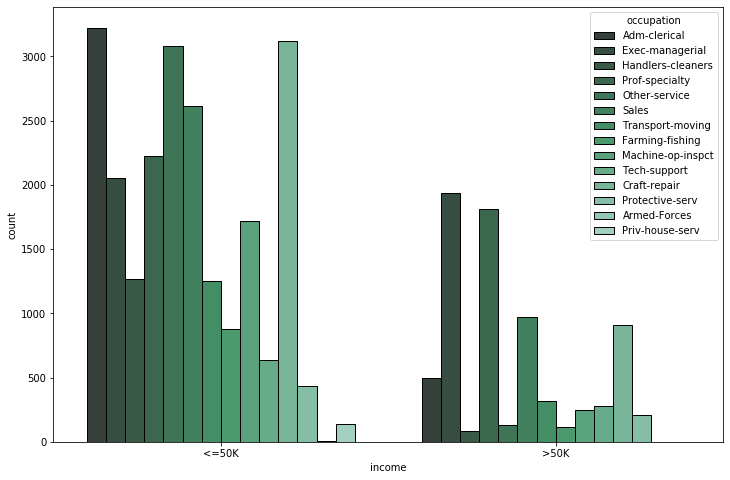

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(df['income'], hue = df['occupation'], palette = 'BuGn_d', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

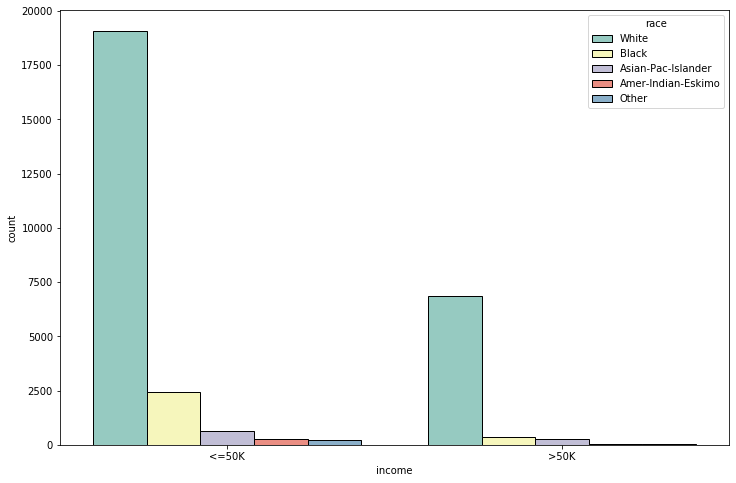

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(df['income'], hue = df['race'], palette = 'Set3', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

### Cleaning data 

 The marital statue feature is too much detailed. We can reduce the variables in marital status in two variables of married and not married

In [17]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [18]:
df['marital-status'] = df['marital-status'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced',
                                  'Married-spouse-absent', 'Married-AF-spouse'], ['not married', 'married', 'not married',
                                   'not married', 'not married', 'not married', 'married'])

In [19]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
#Replace the unwanted variables and distribute the variables into two variables namely 'married' and 'not married'
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender',
                           'native-country'], drop_first=True)

In [21]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting and validating 

In [22]:
# Split the dataframe into features (X) and labels(y)
X = df.drop('income', axis=1)
y = df['income']

In [23]:
y = pd.get_dummies(y, columns=y, drop_first=True)
y = y.iloc[:,-1]
y.shape

(30162,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

Feature selection

In [25]:
feature_select = SelectKBest(chi2, k = 8)  #finding the top 8 best features
feature_select.fit(X_train, y_train)

SelectKBest(k=8, score_func=<function chi2 at 0x000001E02269ED08>)

In [26]:
score_list = feature_select.scores_
top_features = X_train.columns

In [27]:
uni_features = list(zip(score_list, top_features))
print(sorted(uni_features, reverse=True)[0:8])

[(58315959.76621431, 'capital-gain'), (978894.9175476473, 'capital-loss'), (6068.667302576264, 'age'), (4287.730129626891, 'hours-per-week'), (2232.5142393851866, 'marital-status_not married'), (1738.449329138154, 'education-num'), (1055.485898400274, 'relationship_Own-child'), (965.5806546698703, 'occupation_Exec-managerial')]


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)


knn_clf = KNeighborsClassifier(n_neighbors=1)      
knn_clf.fit(X_train_2,y_train)

knn_pred = knn_clf.predict(X_test_2)

accu_knn = accuracy_score(y_test, knn_pred)
print('Accuracy is: ',accu_knn)



Accuracy is:  0.8055693684733963
